In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./data/SalaryData.csv")

## [3] Data Cleaning & Preprocessing

In [4]:
df.shape

(580, 7)

In [5]:
# Display the first 5 rows of the DataFrame
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Date
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,11/7/2016 11:51
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,11/7/2016 17:57
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,12/7/2016 9:17
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,12/7/2016 21:08
4,52.0,Male,Master's,Director,20.0,200000.0,13-07-2016 08:33:16


In [6]:
# Display the Last 5 rows of the DataFrame
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Date
575,NaN,NaN,NaN,NaN,NaN,NaN,14-07-2016 12:10:38
576,NaN,NaN,NaN,NaN,NaN,NaN,14-07-2016 19:26:16
577,NaN,NaN,NaN,NaN,NaN,NaN,15-07-2016 10:29:33
578,NaN,NaN,NaN,NaN,NaN,NaN,11/7/2016 23:41
579,NaN,NaN,NaN,NaN,NaN,NaN,12/7/2016 17:44


In [7]:
# Display the column names of the DataFrame and their data types and non-null values count 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  379 non-null    float64
 1   Gender               378 non-null    object 
 2   Education Level      379 non-null    object 
 3   Job Title            378 non-null    object 
 4   Years of Experience  377 non-null    float64
 5   Salary               379 non-null    float64
 6   Date                 580 non-null    object 
dtypes: float64(3), object(4)
memory usage: 31.8+ KB


- function in pandas provides a summary of statistics for the DataFrame.
   By default, it behaves differently for numeric and non-numeric (categorical) columns
- For numeric columns, it displays statistics such as count, mean, std (standard deviation), min, 25%, 50% (median), 75%, and max.
- For non-numeric (categorical) columns, it displays count, unique (number of unique values), top (most frequent value), and freq (frequency of the most frequent value).
- When you transpose the result using .T, it switches rows and columns, making it easier to read the summary for each column.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,379.0,37.411609,7.099778,23.0,31.0,36.0,44.0,53.0
Years of Experience,377.0,10.030504,6.595836,0.0,4.0,9.0,15.0,25.0
Salary,379.0,100475.857520,48741.959087,350.0,55000.0,95000.0,140000.0,250000.0


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Gender,378,2,Male,197
Education Level,379,3,Bachelor's,227
Job Title,378,174,Director of Marketing,12
Date,580,570,11/7/2016 11:51,2


In [10]:
df['Gender'].value_counts()

Gender
Male      197
Female    181
Name: count, dtype: int64

In [11]:
df['Education Level'].value_counts()

Education Level
Bachelor's    227
Master's      100
PhD            52
Name: count, dtype: int64

In [12]:
df['Job Title'].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Manager            9
Senior Marketing Analyst            9
                                   ..
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Social Media Manager                1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [13]:
# or df.isna().sum()
df.isnull().sum()

Age                    201
Gender                 202
Education Level        201
Job Title              202
Years of Experience    203
Salary                 201
Date                     0
dtype: int64

In [14]:
import numpy as np
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

df.isnull().sum()

Age                      0
Gender                 202
Education Level        201
Job Title              202
Years of Experience      0
Salary                   0
Date                     0
dtype: int64

In [15]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['Gender', 'Education Level', 'Job Title', 'Date'], dtype='object')

In [16]:
for column in object_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [17]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Date                   0
dtype: int64

In [18]:
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## [4] Exploratory Data Analysis

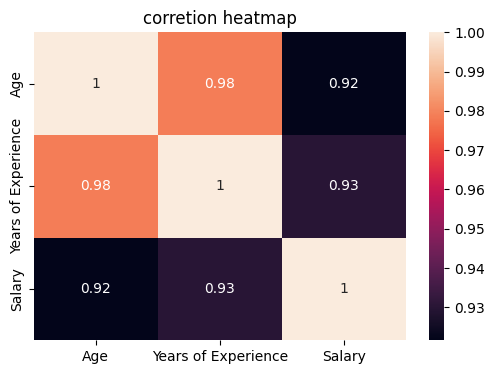

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# show Hetmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title('corretion heatmap')
plt.show()

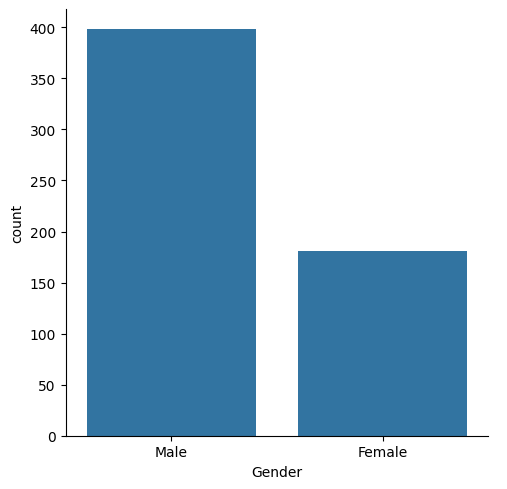

In [21]:
sns.catplot(df, x = 'Gender', kind = 'count')

<Axes: xlabel='Salary', ylabel='Years of Experience'>

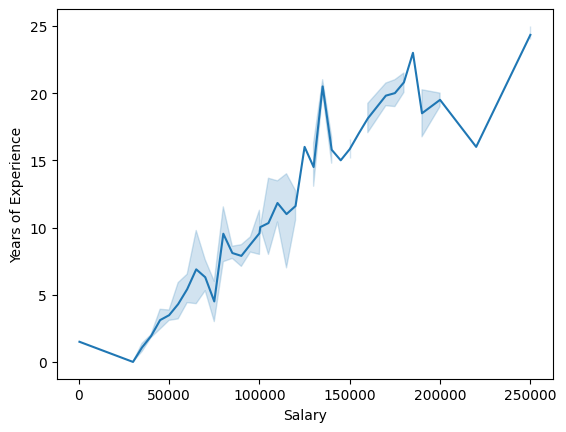

In [22]:
sns.lineplot(df, x = 'Salary', y = 'Years of Experience')

In [23]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Date'],
      dtype='object')

## [5] Feature Engineering & Selection

In [24]:
y = df['Salary']
X = df['Years of Experience']

print(X.shape)
print(y.shape)

(579,)
(579,)


In [25]:
X = X.values.reshape(-1, 1)
print(X.shape)

(579, 1)


## [6] Model Selection
### Traditional Machine Learning Models
  - Linear Models (Work well with normally distributed data)
    - Linear Regression
  - Tree-Based Models (Handle non-linearity and categorical variables well)
    - Random Forest Regressor 
    - XGBoost
  - Deep Learning Models (Neural Networks)
    -  Simple Neural Networks
  

## [7] Model Training

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## [8] Model Evaluation & Tuning

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
mape = (mae / y_test.mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R2 Score: {r2:.2%}")


Mean Squared Error: 209387060.20098355
Mean Absolute Error: 8955.92710967202
Mean Absolute Percentage Error (MAPE): 8.68%
R2 Score: 89.57%


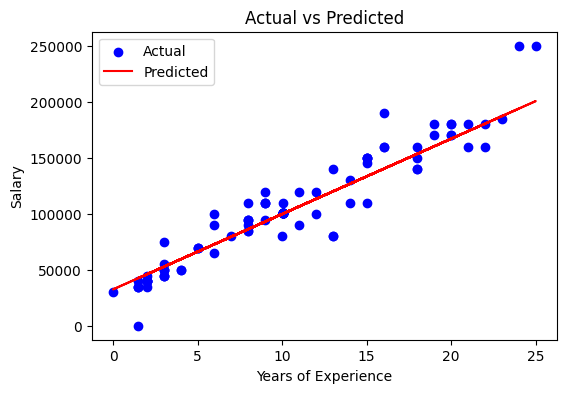

In [29]:
# scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

### Save the model

In [30]:
# Save the model with has name and accuracy
import joblib

joblib.dump(model, f'../salary-prediction/models/LR_model_{r2:.2%}.joblib')

['../salary-prediction/models/LR_model_89.57%.joblib']

### Load Model

In [31]:
from joblib import load

model = load('../salary-prediction/models/LR_model_89.57%.joblib')

### Test Model

In [35]:
import numpy as np

# Example input (Years of Experience)
X_new = np.array([[3]])  # Ensure it's a 2D array

y_pred = model.predict(X_new)

# Print result
print(f"Predicted Salary: {y_pred[0]:.2f}")


Predicted Salary: 52901.55
